Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Lab 1 - Lorenzo Formentin

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [53]:
from random import random, seed
from itertools import product
from itertools import accumulate
import numpy as np
from icecream import ic
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [54]:
UNIVERSE_SIZE = 10000 #100_000
NUM_SETS = 1000 #10_000
DENSITY = 0.2 #0.3

MAX_ITERATION = NUM_SETS * 2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [55]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)

## Helper Functions

In [56]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def fitness(solution):
    return (valid(solution), -cost(solution))

## Have Fun!

In [57]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(True, 4278915.654413476)

In [58]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(True, 2137443.858379106)

In [59]:
def tweak(solution, dim=1):
    new_solution = solution.copy()
    indices = rng.choice(NUM_SETS, size=dim, replace=False)
    for i in indices:
        new_solution[i] = not new_solution[i]
        if valid(solution) and not valid(new_solution):
            return solution 
    return new_solution

def steepest_ascent(solution, k=5):
    best_sol = solution
    for _ in range(k):
        new_solution = tweak(solution)
        if fitness(new_solution) > fitness(best_sol):
            best_sol = new_solution
    return best_sol

  0%|          | 2/2000 [00:00<06:57,  4.79it/s]

100%|██████████| 2000/2000 [01:28<00:00, 22.65it/s] 
ic| valid(solution): True, fitness(solution)[1]: -130329.52530607338
ic| history.index(float(fitness(solution)[1])): 1470


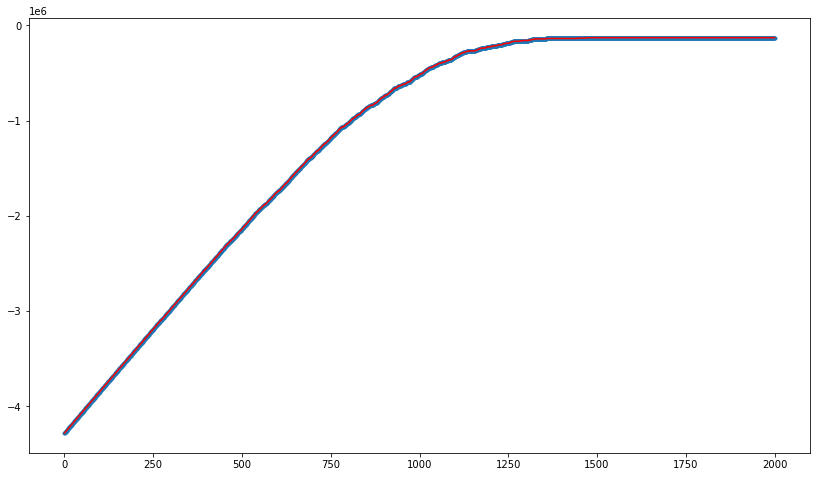

In [60]:
solution = np.full(NUM_SETS, True) 

history = [float(fitness(solution)[1])]
for i in tqdm(range(MAX_ITERATION)):
    solution = steepest_ascent(solution)
    history.append(float(fitness(solution)[1]))


ic(valid(solution), fitness(solution)[1])
ic(history.index(float(fitness(solution)[1])))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")